In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm, datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

In [2]:
def make_meshgrid(x, y, h=.02):
    d = 5
    x_min, x_max = x.min() - d, x.max() + d
    y_min, y_max = y.min() - d, y.max() + d
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

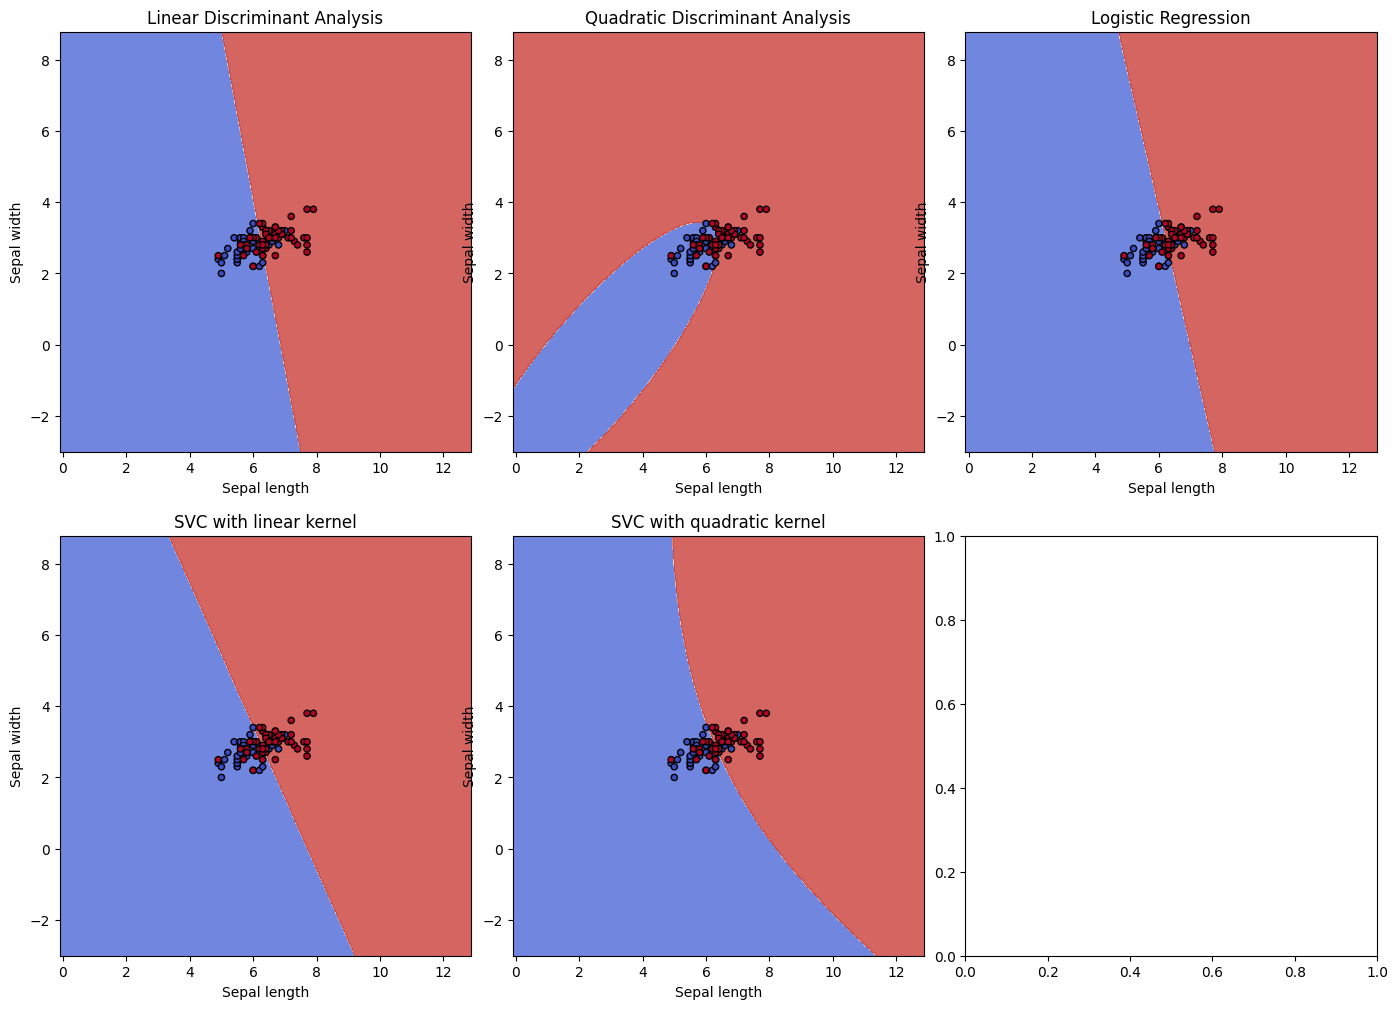

In [3]:
iris = datasets.load_iris()
iris_dataframe = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_dataframe['target'] = iris['target']
iris_dataframe['name'] = iris_dataframe['target'].map(lambda x : iris['target_names'][x])

C = 1.0  # SVM regularization parameter
models = [
    LinearDiscriminantAnalysis(solver="svd", store_covariance=True),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression(random_state=0),
    svm.SVC(kernel='linear', C=C),
    svm.SVC(kernel='poly', degree=2, gamma='auto', C=C)
]

X = iris.data[iris.target!=0, :2]
y = iris.target[iris.target!=0]

for classifier in models:
    classifier.fit(X, y)

titles = [
    'Linear Discriminant Analysis',
    'Quadratic Discriminant Analysis',
    "Logistic Regression",
    'SVC with linear kernel',
    'SVC with quadratic kernel'
]

fig, sub = plt.subplots(2, 3,figsize=(17,12))
plt.subplots_adjust(wspace=0.1, hspace=0.2)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_title(title)

plt.show()

In [18]:
print(models[0].predict(np.array([[5.9, 3.0]])))

[1]
